In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [8]:
data <- read_csv("data_by_genres_o.csv") %>%
        mutate (genres = as.factor (genres))
data

Parsed with column specification:
cols(
  mode = col_double(),
  genres = col_character(),
  acousticness = col_double(),
  danceability = col_double(),
  duration_ms = col_double(),
  energy = col_double(),
  instrumentalness = col_double(),
  liveness = col_double(),
  loudness = col_double(),
  speechiness = col_double(),
  tempo = col_double(),
  valence = col_double(),
  popularity = col_double(),
  key = col_double()
)



mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21st century classical,0.97933333,0.1628833,160297.7,0.07131667,6.068337e-01,0.36160000,-31.514333,0.04056667,75.33650,0.1037833,27.833333,6
1,432hz,0.49478000,0.2993333,1048887.3,0.45067833,4.777617e-01,0.13100000,-16.854000,0.07681667,120.28567,0.2217500,52.500000,5
1,8-bit,0.76200000,0.7120000,115177.0,0.81800000,8.760000e-01,0.12600000,-9.180000,0.04700000,133.44400,0.9750000,48.000000,7
1,[],0.65141702,0.5290926,232880.9,0.41914607,2.053092e-01,0.21869585,-12.288965,0.10787156,112.85735,0.5136043,20.859882,7
1,a cappella,0.67655730,0.5389612,190628.5,0.31643357,3.003441e-03,0.17225414,-12.479387,0.08285144,112.11036,0.4482487,45.820071,7
1,abstract,0.45921000,0.5161667,343196.5,0.44241667,8.496667e-01,0.11806667,-15.472083,0.04651667,127.88575,0.3073250,43.500000,1
1,abstract beats,0.34214667,0.6230000,229936.2,0.52780000,3.336026e-01,0.09965333,-7.918000,0.11637333,112.41380,0.4935067,58.933333,10
1,abstract hip hop,0.24385406,0.6945709,231849.2,0.64623464,2.423126e-02,0.16854292,-7.349328,0.21425770,108.24499,0.5713909,39.790702,2
0,accordeon,0.32300000,0.5880000,164000.0,0.39200000,4.410000e-01,0.07940000,-14.899000,0.07270000,109.13100,0.7090000,39.000000,2


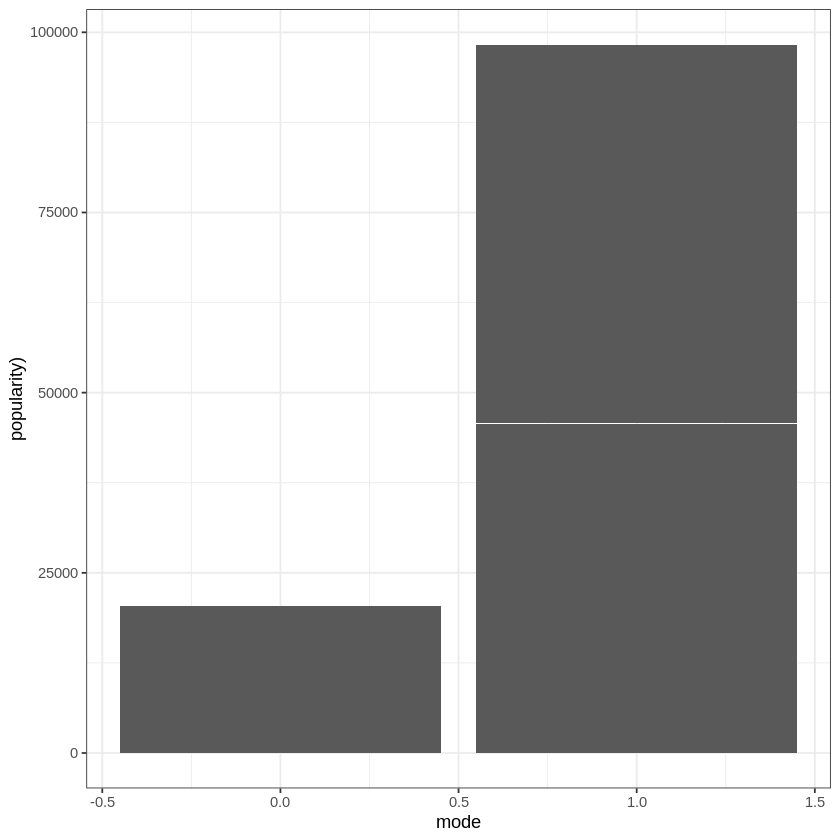

In [45]:
#Does indicate the existance of a relationship between the variables
mode_plot <- ggplot(data, aes(x = mode,y = popularity)) + 
  geom_bar (stat = "identity") + 
  xlab("mode") +
  ylab("popularity)") +
  theme_bw() 
mode_plot

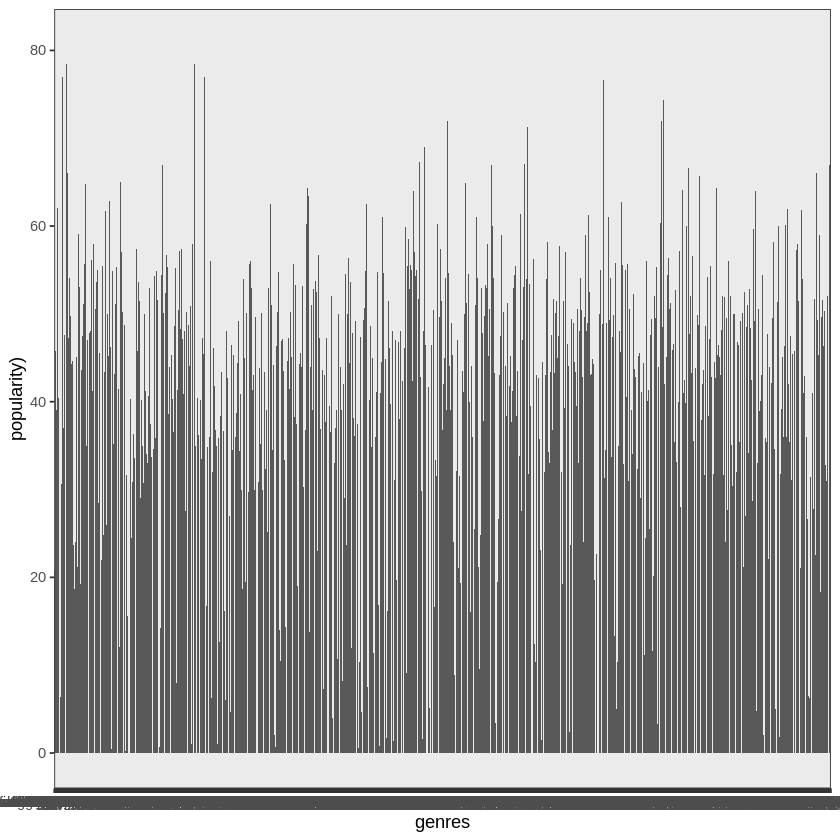

In [46]:
#Does NOT indicate the existance of a relationship between the variables or the relationship is very weak
genres_plot <- ggplot(data, aes(x = genres,y = popularity)) + 
  geom_bar (stat = "identity") + 
  xlab("genres") +
  ylab("popularity)") +
  theme_bw() 
genres_plot

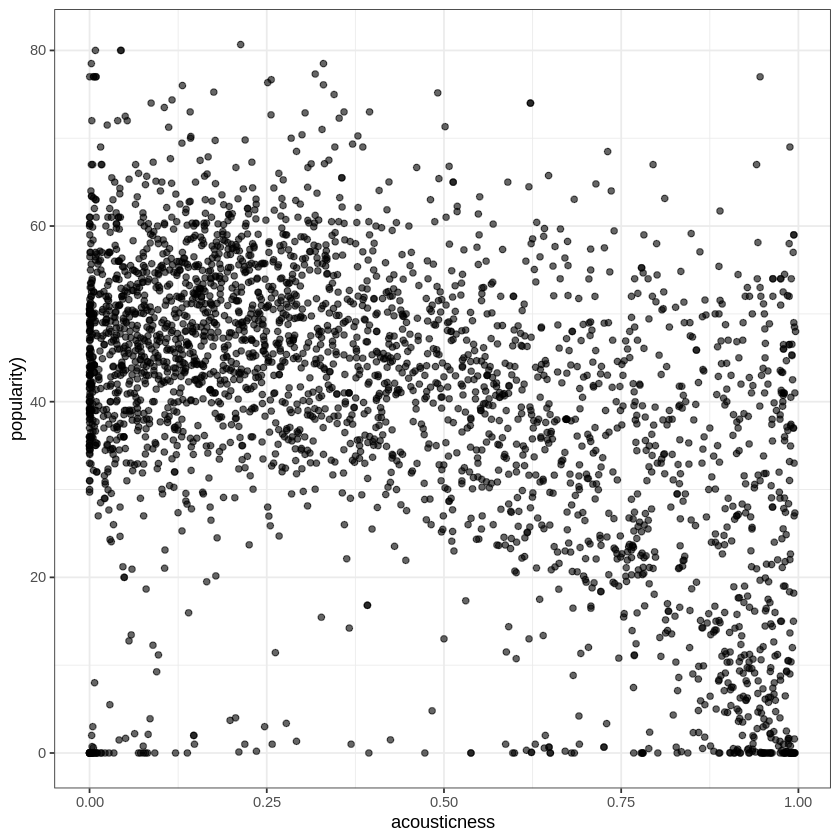

In [32]:
#Does NOT indicate the existance of a relationship between the variables or the relationship is very weak
acousticness_plot <- ggplot(data, aes(x = acousticness,y = popularity)) + 
  geom_point(alpha = 0.6) + 
  xlab("acousticness") +
  ylab("popularity)") +
  theme_bw() 
acousticness_plot

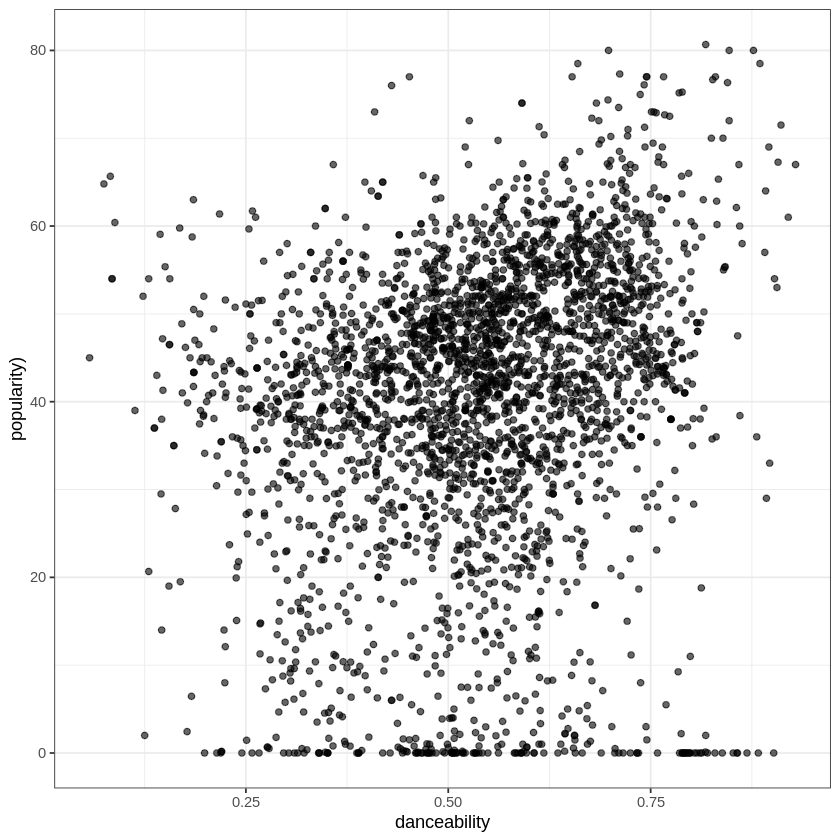

In [31]:
#Does NOT indicate the existance of a relationship between the variables or the relationship is very weak
danceability_plot <- ggplot(data, aes(x = danceability,y = popularity)) + 
  geom_point(alpha = 0.6) + 
  xlab("danceability") +
  ylab("popularity)") +
  theme_bw() 
danceability_plot

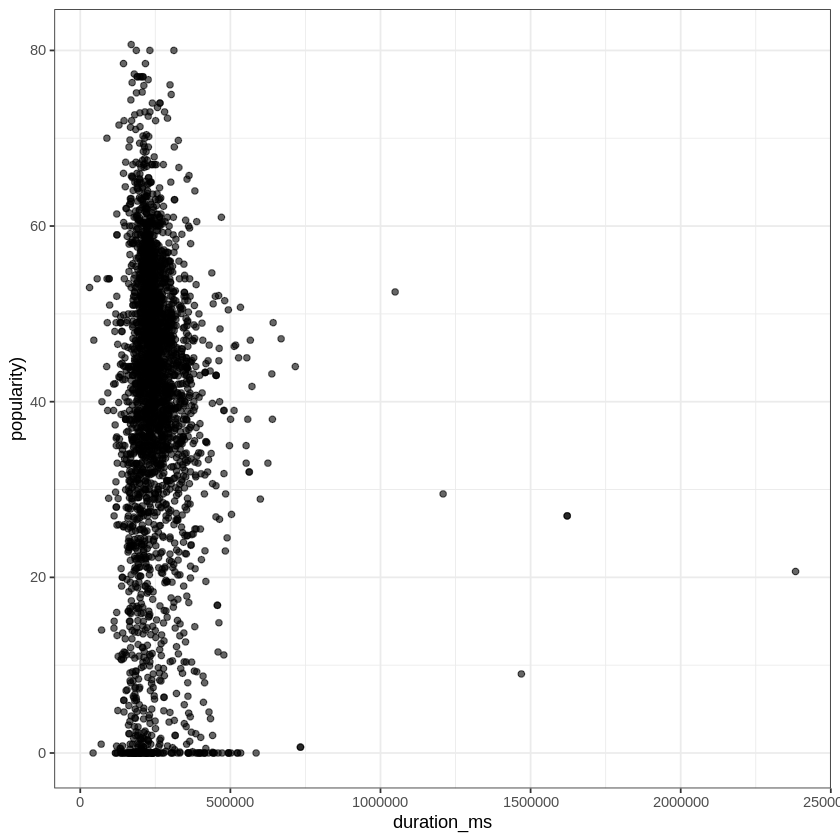

In [30]:
#Does indicate the existance of a relationship between the variables
duration_ms_plot <- ggplot(data, aes(x = duration_ms,y = popularity)) + 
  geom_point(alpha = 0.6) + 
  xlab("duration_ms") +
  ylab("popularity)") +
  theme_bw() 
duration_ms_plot

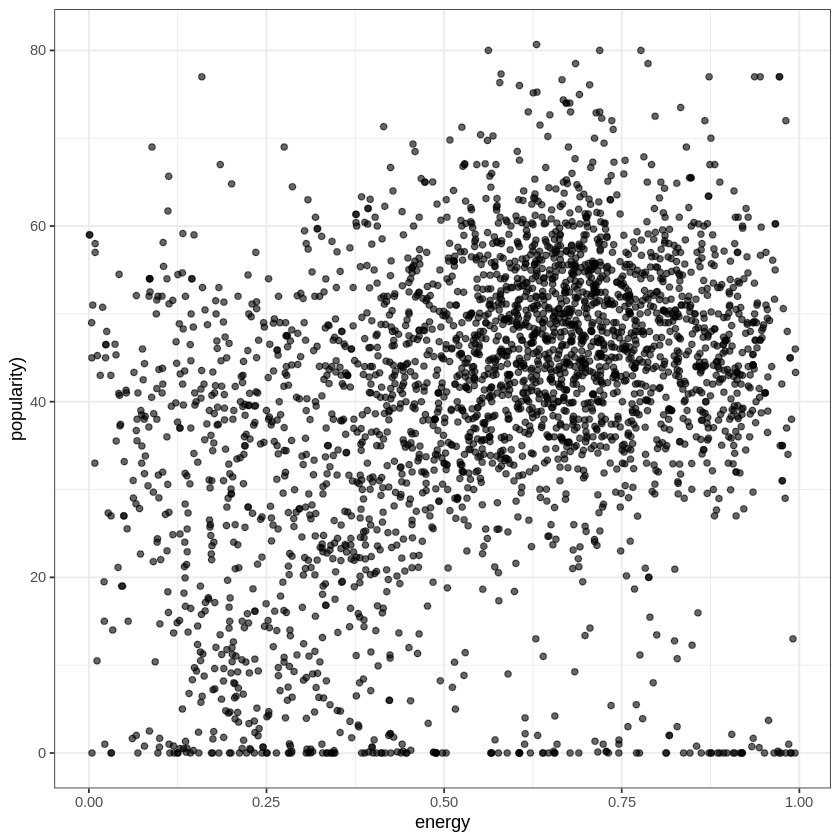

In [29]:
#Does NOT indicate the existance of a relationship between the variables or the relationship is very weak
energy_plot <- ggplot(data, aes(x = energy,y = popularity)) + 
  geom_point(alpha = 0.6) + 
  xlab("energy") +
  ylab("popularity)") +
  theme_bw() 
energy_plot

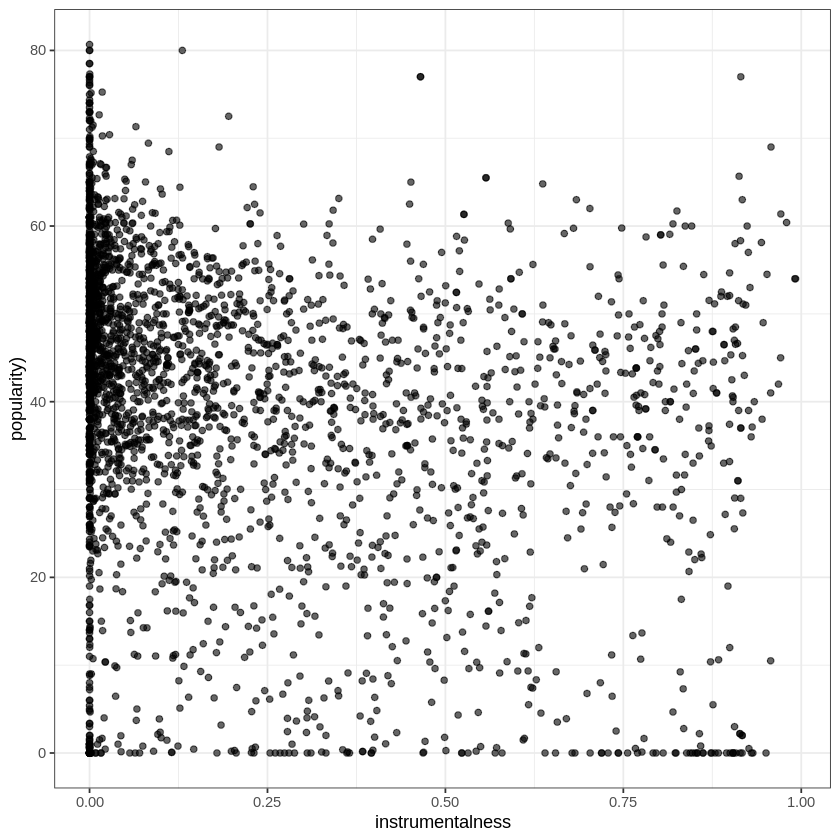

In [28]:
#Does NOT indicate the existance of a relationship between the variables or the relationship is very weak
instrumentalness_plot <- ggplot(data, aes(x = instrumentalness,y = popularity)) + 
  geom_point(alpha = 0.6) + 
  xlab("instrumentalness") +
  ylab("popularity)") +
  theme_bw() 
instrumentalness_plot

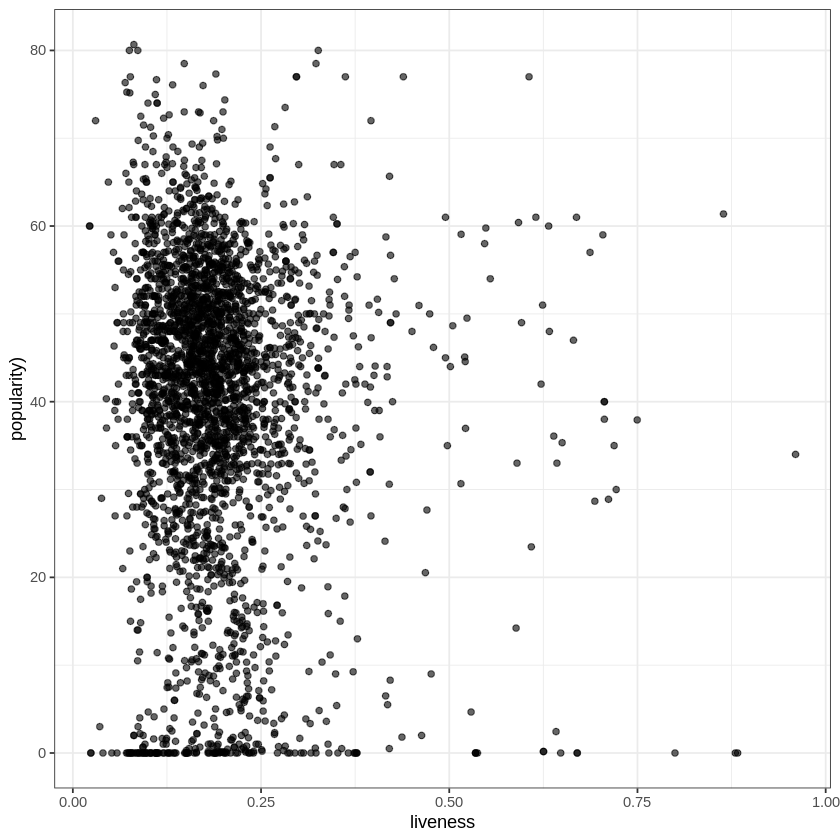

In [27]:
#Does indicate the existance of a relationship between the variables
liveness_plot <- ggplot(data, aes(x = liveness,y = popularity)) + 
  geom_point(alpha = 0.6) + 
  xlab("liveness") +
  ylab("popularity)") +
  theme_bw() 
liveness_plot

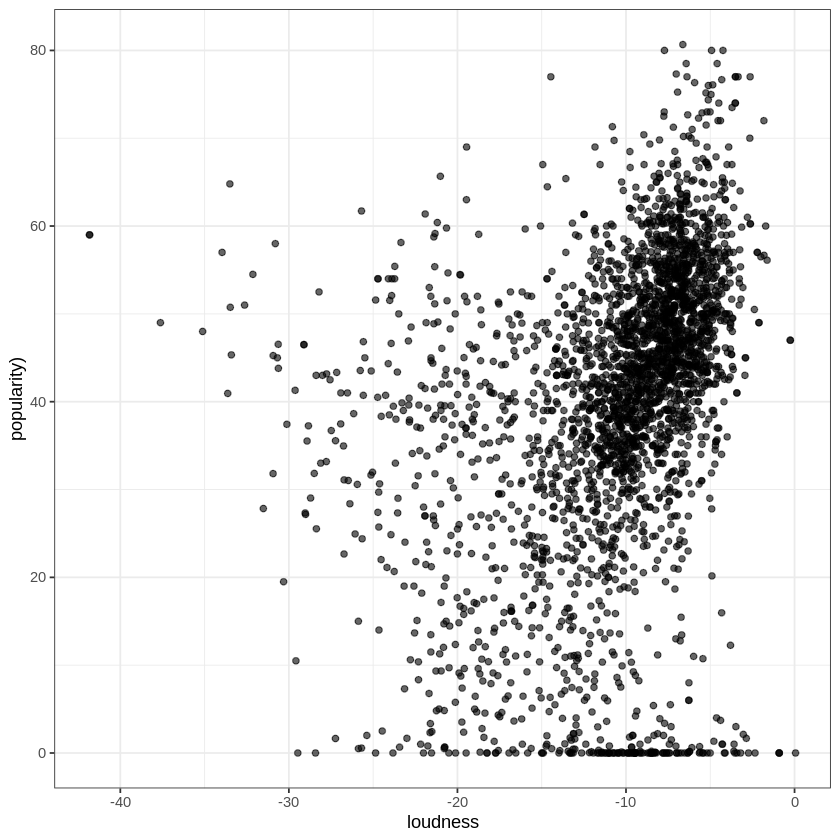

In [24]:
#Does indicate the existance of a relationship between the variables
loudness_plot <- ggplot(data, aes(x = loudness,y = popularity)) + 
  geom_point(alpha = 0.6) + 
  xlab("loudness") +
  ylab("popularity)") +
  theme_bw() 
loudness_plot

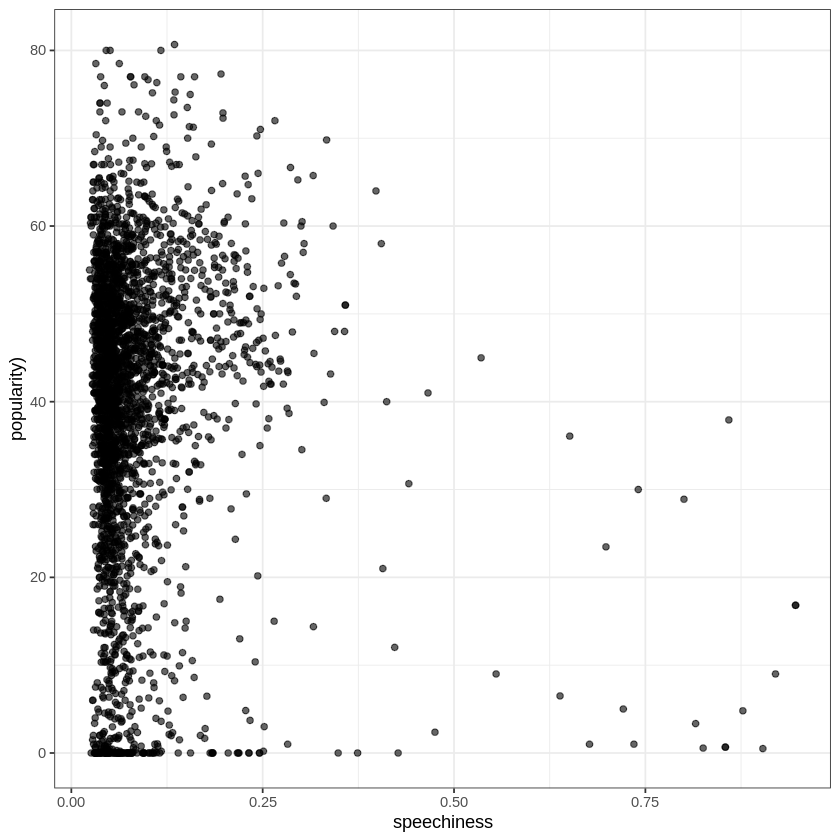

In [33]:
#Does indicate the existance of a relationship between the variables
speechiness_plot <- ggplot(data, aes(x = speechiness,y = popularity)) + 
  geom_point(alpha = 0.6) + 
  xlab("speechiness") +
  ylab("popularity)") +
  theme_bw() 
speechiness_plot

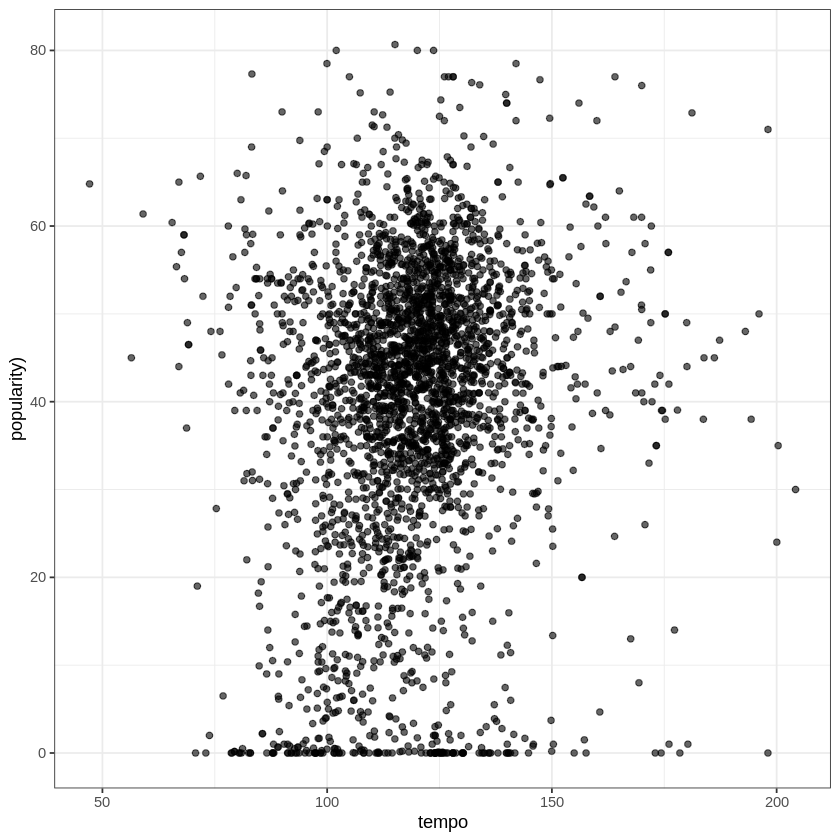

In [34]:
#Does indicate the existance of a relationship between the variables
tempo_plot <- ggplot(data, aes(x = tempo,y = popularity)) + 
  geom_point(alpha = 0.6) + 
  xlab("tempo") +
  ylab("popularity)") +
  theme_bw() 
tempo_plot

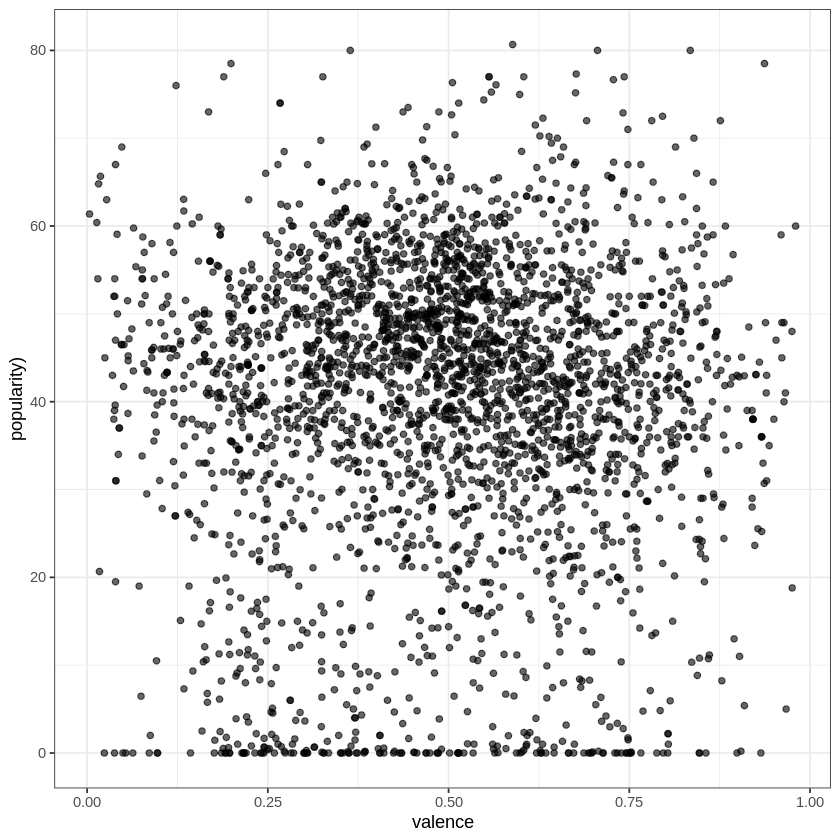

In [35]:
#Does NOT indicate the existance of a relationship between the variables or the relationship is very weak
valence_plot <- ggplot(data, aes(x = valence,y = popularity)) + 
  geom_point(alpha = 0.6) + 
  xlab("valence") +
  ylab("popularity)") +
  theme_bw() 
valence_plot

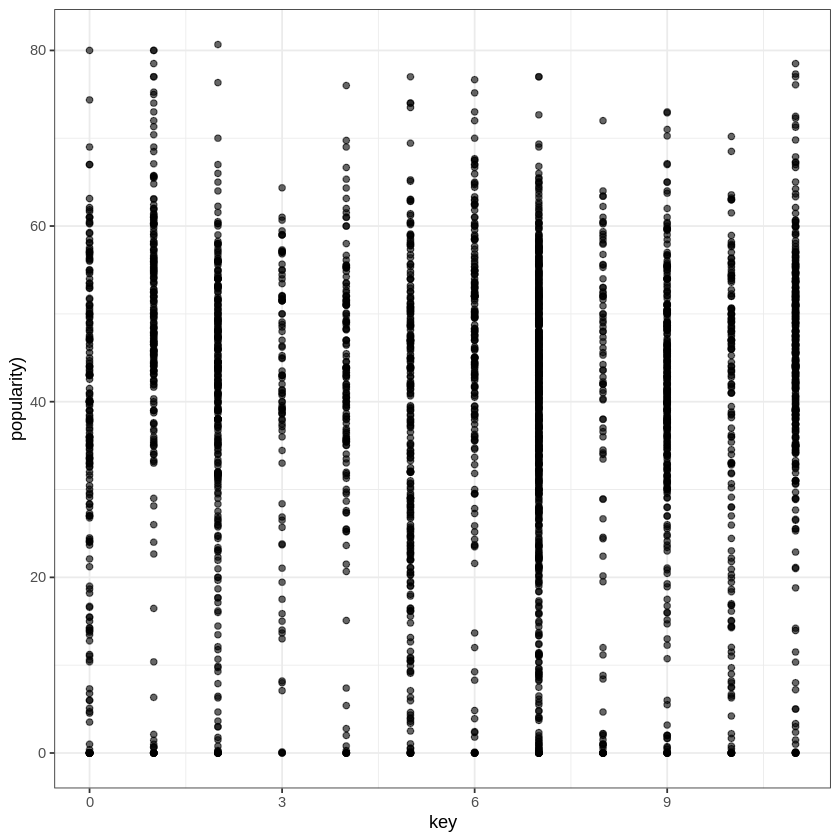

In [37]:
#Does NOT indicate the existance of a relationship between the variables or the relationship is very weak
key_plot <- ggplot(data, aes(x = key,y = popularity)) + 
  geom_point(alpha = 0.6) + 
  xlab("key") +
  ylab("popularity)") +
  theme_bw() 
key_plot

In [ ]:
# The qualitative analysis obtained by plotting the individual variables against popularity indicates that some of the variables in the graph
# have a strong relationship with popularity and can, consequently, be used as predictors in our model. These are:
# mode, duration_ms, liveness, loudness, speechiness, and tempo. We will use the observations on these variables to predict numerical values 
# on popularity using a multivariate K-nearest neighbours regression. We will use our training set to create models using different combinations
# of the aformentioned predictors and test their accuracy using the test set. In the end, we will create a visualization witht the most accurate
# predictors. 